In [4]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [6]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [7]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [8]:
tf.keras.backend.clear_session()

In [9]:
subject = 'Espirito_Santo - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [10]:
data = pd.read_csv('2003_raw_Espirito_Santo_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Espirito_Santo - PIB - Per Capita,Espirito_Santo - PIB - Preços de Mercado,Espirito_Santo - PIB - Estadual,Espirito_Santo - PIB - Construção Civil,Espirito_Santo - População,Espirito_Santo - INCC (%),Espirito_Santo - IPCA - Variação mensal durante o Plano Real (%),Espirito_Santo - IGP-DI,Espirito_Santo - Taxa Selic (%),Espirito_Santo - IDH - Longevidade,Espirito_Santo - IDH - Renda,Espirito_Santo - IDH - Educação,Espirito_Santo - NFSP - Fluxo Mensal (Milhões de reais),Espirito_Santo - Estoque liquido de capital fixo - (R$),Espirito_Santo - Desemprego,Espirito_Santo - Produção de Cimento (t),Espirito_Santo - Valor,Espirito_Santo - Consumo de Cimento (t)
0,2003-01-01,3.531187e+06,1.858768e+06,1.102902,3.062101e+06,3201722.0,1.70,12.53,2.70,0.082293,0.777,0.687,0.491,3.46,6.098524e+06,10.666093,NaN,0.27,48426.0
1,2003-02-01,3.531187e+06,1.858768e+06,1.102902,3.062101e+06,3201722.0,1.51,2.25,2.17,0.088771,0.777,0.687,0.491,3.59,6.172460e+06,10.666093,NaN,0.27,54969.0
2,2003-03-01,3.531187e+06,1.858768e+06,1.102902,3.062101e+06,3201722.0,1.39,3.86,1.59,0.090733,0.777,0.687,0.491,3.84,6.172460e+06,10.666093,NaN,0.30,53847.0
3,2003-04-01,3.531187e+06,1.858768e+06,1.102902,3.062101e+06,3201722.0,1.38,5.13,1.66,0.092749,0.777,0.687,0.491,3.95,6.172460e+06,10.666093,87014.0,0.30,50375.0
4,2003-05-01,3.531187e+06,1.858768e+06,1.102902,3.062101e+06,3201722.0,0.90,6.15,0.41,0.092758,0.777,0.687,0.491,4.06,6.172460e+06,10.666093,103394.0,0.30,52576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,5.741863e+06,9.688489e+06,1.445444,2.539381e+06,3972388.0,0.58,2.42,-0.01,0.024620,0.850,0.740,0.730,0.69,7.827728e+06,12.300000,175623.0,0.37,104711.0
200,2019-09-01,5.741863e+06,9.688489e+06,1.445444,2.539381e+06,3972388.0,0.42,2.54,-0.51,0.022751,0.850,0.740,0.730,0.62,7.827728e+06,12.000000,33989.0,0.37,97530.0
201,2019-10-01,5.741863e+06,9.688489e+06,1.445444,2.539381e+06,3972388.0,0.46,2.49,0.50,0.022035,0.850,0.740,0.730,0.59,7.827728e+06,11.900000,301394.0,0.37,99651.0
202,2019-11-01,5.741863e+06,9.688489e+06,1.445444,2.539381e+06,3972388.0,0.18,2.60,0.55,0.020790,0.850,0.740,0.730,0.57,7.827728e+06,11.700000,113619.0,0.37,76710.0


In [11]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      56.490
1      53.578
2      60.481
3      64.833
4      64.063
        ...  
199       NaN
200       NaN
201       NaN
202       NaN
203       NaN
Name: Espirito_Santo - Consumo de Cimento (t), Length: 204, dtype: float64

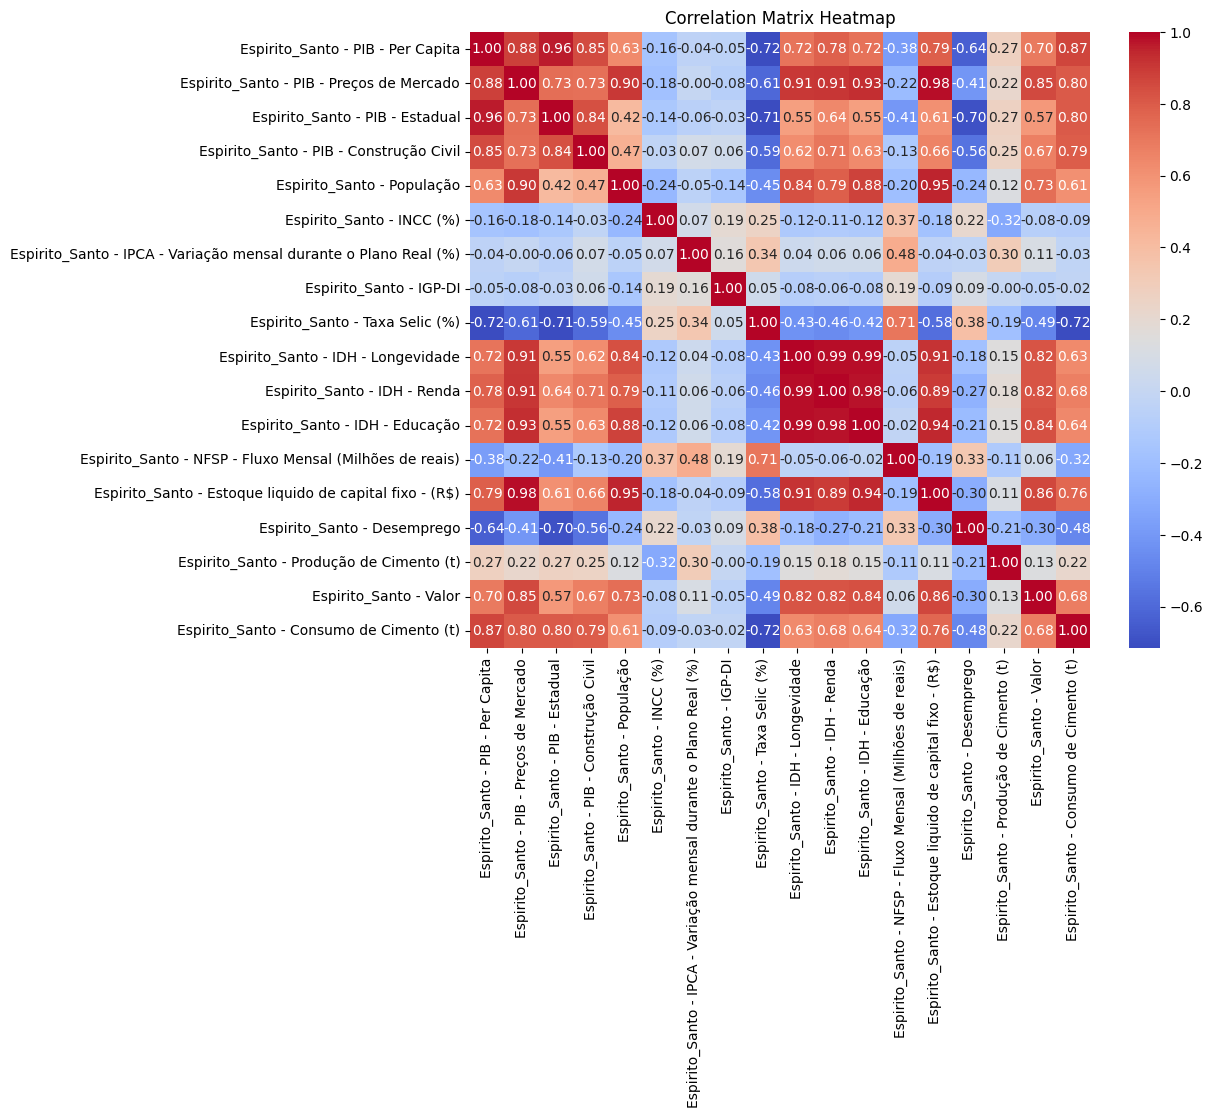

In [12]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [13]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Espirito_Santo - PIB - Per Capita,Espirito_Santo - PIB - Preços de Mercado,Espirito_Santo - PIB - Estadual,Espirito_Santo - PIB - Construção Civil,Espirito_Santo - População,Espirito_Santo - INCC (%),Espirito_Santo - IPCA - Variação mensal durante o Plano Real (%),Espirito_Santo - IGP-DI,Espirito_Santo - Taxa Selic (%),Espirito_Santo - IDH - Longevidade,Espirito_Santo - IDH - Renda,Espirito_Santo - IDH - Educação,Espirito_Santo - NFSP - Fluxo Mensal (Milhões de reais),Espirito_Santo - Estoque liquido de capital fixo - (R$),Espirito_Santo - Desemprego,Espirito_Santo - Produção de Cimento (t),Espirito_Santo - Valor
0,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,1.998868,4.052332,3.466715,2.303195,-0.925433,-0.935102,-0.917166,3.108599,-1.539424,1.242743,-1.000000,-1.196060
1,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,1.647487,-0.596188,2.630940,2.745235,-0.925433,-0.935102,-0.917166,3.275709,-1.411460,1.242743,-1.000000,-1.196060
2,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,1.425561,0.131839,1.716318,2.879123,-0.925433,-0.935102,-0.917166,3.597074,-1.411460,1.242743,-1.000000,-0.527517
3,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,1.407068,0.706121,1.826703,3.016721,-0.925433,-0.935102,-0.917166,3.738475,-1.411460,1.242743,-0.455513,-0.527517
4,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,0.519367,1.167355,-0.144465,3.017322,-0.925433,-0.935102,-0.917166,3.879875,-1.411460,1.242743,-0.361600,-0.527517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-0.380464,0.941214,-0.974505,-0.635978,1.781170,-0.590259,-0.966985,-1.264088,-0.729479,1.481573,0.975967,1.383771,-0.374997,1.441346,2.009023,0.046609,1.032416
176,-0.380464,0.941214,-0.974505,-0.635978,1.781170,-0.479297,-0.881068,-0.412544,-0.941281,1.481573,0.975967,1.383771,-0.439270,1.441346,2.009023,-0.751357,1.032416
177,-0.380464,0.941214,-0.974505,-0.635978,1.781170,-1.034110,-0.808718,0.186692,-1.140710,1.481573,0.975967,1.383771,-0.503543,1.441346,2.009023,0.101770,1.032416
178,-0.380464,0.941214,-0.974505,-0.635978,1.781170,-0.571766,-0.614276,-0.633314,-1.226481,1.481573,0.975967,1.383771,-0.503543,1.441346,2.071125,-0.283774,1.032416


In [14]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Espirito_Santo - PIB - Per Capita,Espirito_Santo - PIB - Preços de Mercado,Espirito_Santo - PIB - Estadual,Espirito_Santo - PIB - Construção Civil,Espirito_Santo - População,Espirito_Santo - INCC (%),Espirito_Santo - IPCA - Variação mensal durante o Plano Real (%),Espirito_Santo - IGP-DI,Espirito_Santo - Taxa Selic (%),Espirito_Santo - IDH - Longevidade,Espirito_Santo - IDH - Renda,Espirito_Santo - IDH - Educação,Espirito_Santo - NFSP - Fluxo Mensal (Milhões de reais),Espirito_Santo - Estoque liquido de capital fixo - (R$),Espirito_Santo - Desemprego,Espirito_Santo - Produção de Cimento (t),Espirito_Santo - Valor
0,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,1.998868,4.052332,3.466715,2.303195,-0.925433,-0.935102,-0.917166,3.108599,-1.539424,1.242743,-1.000000,-1.196060
1,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,1.647487,-0.596188,2.630940,2.745235,-0.925433,-0.935102,-0.917166,3.275709,-1.411460,1.242743,-1.000000,-1.196060
2,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,1.425561,0.131839,1.716318,2.879123,-0.925433,-0.935102,-0.917166,3.597074,-1.411460,1.242743,-1.000000,-0.527517
3,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,1.407068,0.706121,1.826703,3.016721,-0.925433,-0.935102,-0.917166,3.738475,-1.411460,1.242743,-0.455513,-0.527517
4,-1.641304,-1.463227,-1.471260,-0.450330,-1.457609,0.519367,1.167355,-0.144465,3.017322,-0.925433,-0.935102,-0.917166,3.879875,-1.411460,1.242743,-0.361600,-0.527517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.432820,1.225301,-0.036331,0.205177,1.597468,-0.238878,0.629248,-1.406012,0.272188,1.151846,1.084141,1.383771,0.794771,1.416222,0.145966,-1.000000,1.032416
164,0.432820,1.225301,-0.036331,0.205177,1.597468,-0.608753,0.837256,-0.112926,0.272188,1.151846,1.084141,1.383771,0.730498,1.416222,0.208068,-1.000000,1.032416
165,0.432820,1.225301,-0.036331,0.205177,1.597468,-0.534778,0.877953,-0.743700,0.272188,1.151846,1.084141,1.383771,0.743353,1.416222,0.270170,-1.000000,1.076985
166,0.432820,1.225301,-0.036331,0.205177,1.597468,-0.756703,1.000045,-0.586006,0.248413,1.151846,1.084141,1.383771,0.614807,1.416222,0.270170,-1.000000,1.076985


In [15]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       56.490
1       53.578
2       60.481
3       64.833
4       64.063
        ...   
163    107.106
164    101.893
165    110.551
166    100.587
167     94.220
Name: Espirito_Santo - Consumo de Cimento (t), Length: 168, dtype: float64

In [16]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [17]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [18]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Espirito_Santo - PIB - Per Capita,Espirito_Santo - PIB - Preços de Mercado,Espirito_Santo - PIB - Estadual,Espirito_Santo - PIB - Construção Civil,Espirito_Santo - População,Espirito_Santo - INCC (%),Espirito_Santo - IPCA - Variação mensal durante o Plano Real (%),Espirito_Santo - IGP-DI,Espirito_Santo - Taxa Selic (%),Espirito_Santo - IDH - Longevidade,Espirito_Santo - IDH - Renda,Espirito_Santo - IDH - Educação,Espirito_Santo - NFSP - Fluxo Mensal (Milhões de reais),Espirito_Santo - Estoque liquido de capital fixo - (R$),Espirito_Santo - Desemprego,Espirito_Santo - Produção de Cimento (t),Espirito_Santo - Valor
132,1.120310,1.128752,0.866048,1.412914,1.217592,-0.960135,1.058830,0.297077,-0.755853,0.822119,1.084141,1.094951,-0.285015,0.834026,-0.847665,3.967935,1.032416
133,1.120310,1.128752,0.866048,1.412914,1.217592,0.482379,-1.364912,-0.160234,-0.688658,0.822119,1.084141,1.094951,-0.349288,1.129318,-0.537155,-1.000000,1.032416
134,1.120310,1.128752,0.866048,1.412914,1.217592,-0.534778,-1.052901,0.549386,-0.626634,0.822119,1.084141,1.094951,-0.374997,1.129318,-0.350850,-1.000000,1.032416
135,1.120310,1.128752,0.866048,1.412914,1.217592,-0.627247,-0.627842,1.542855,-0.571481,0.822119,1.084141,1.094951,-0.259306,1.129318,-0.475054,-0.186914,1.032416
136,1.120310,1.128752,0.866048,1.412914,1.217592,0.482379,-0.320352,-0.081387,-0.516512,0.822119,1.084141,1.094951,-0.053632,1.129318,-0.599257,-1.000000,1.032416
137,1.120310,1.128752,0.866048,1.412914,1.217592,2.646150,-0.107822,-1.500628,-0.510405,0.822119,1.084141,1.094951,0.023495,1.129318,-0.723461,-1.000000,1.032416
138,1.120310,1.128752,0.866048,1.412914,1.217592,0.075516,0.082098,-1.784477,-0.510405,0.822119,1.084141,1.094951,-0.002214,1.129318,-0.785563,-1.000000,1.032416
139,1.120310,1.128752,0.866048,1.412914,1.217592,0.241960,0.086620,-1.658322,-0.510405,0.822119,1.084141,1.094951,-0.143614,1.129318,-0.909767,0.089173,1.032416
140,1.120310,1.128752,0.866048,1.412914,1.217592,-0.997122,0.204189,-0.696392,-0.510054,0.822119,1.084141,1.094951,-0.182178,1.129318,-1.033971,-1.000000,1.032416
141,1.120310,1.128752,0.866048,1.412914,1.217592,-0.867666,0.470982,-0.759469,-0.510405,0.822119,1.084141,1.094951,-0.105051,1.129318,-1.158175,-1.000000,1.032416


In [19]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [20]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(144, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(72, activation='tanh',
                             return_sequences=True,
                             kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.15,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [18]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [19]:
def predictor(model, test_input, test_target, start_target):
    
    predictions = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        if (prediction[0][0] < 0.0):
            return None, None
        predictions.append(prediction[0][0])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    return df_results, predictions

In [20]:
def statistical_validator(train_input, train_target, test_input, test_target, start_target):
    
    pd.set_option('display.max_columns', None)
    predictions_list = []
    error_percent = []
    
    i = 0
    while i < 10:
        winner_seed = get_a_good_seed(train_input, train_target, test_input, test_target)
        trained_model, history = lstm_model(train_input, 
                                            train_target, 
                                            want_verbose=0, 
                                            seed=winner_seed)
        df_results, predictions = predictor(trained_model, 
                                            test_input, 
                                            test_target, 
                                            start_index)
        if predictions is not None:
            display(df_results.T)
            predictions_list.append(predictions)
            i += 1
        
    predictions_means = np.mean(predictions_list, axis=0)
    results_data = []
   
    for j in range(12):
        target = test_target[start_target + j]
        error = np.abs(predictions_means[j] - target)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                            predictions_means[j], 
                            target, 
                            error])
    display("FINAL___________________________________________________________________")
    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])
    display(df_results.T)
        
    mae_mean = np.mean(predictions_means)
    mape_mean = np.mean(error_percent) 

    return mae_mean, mape_mean

In [22]:
mae, mape = statistical_validator(reshaped_train, 
                                  reshaped_target, 
                                  reshaped_test, 
                                  reshaped_test_target, 
                                  start_index)

[229415530, 3191129784, 3802873864, 1057534330, 3234418735, 325181053, 2163668093, 1254957253, 77342355, 1834036444]


Step: 0 ___________________________________________
val_loss: 224.93508911132812
winner_seed: 229415530


Step: 1 ___________________________________________
val_loss: 135.91400146484375
winner_seed: 3191129784


Step: 2 ___________________________________________
val_loss: 121.3163833618164
winner_seed: 3802873864


Step: 3 ___________________________________________
val_loss: 89.08058166503906
winner_seed: 1057534330


Step: 4 ___________________________________________
val_loss: 121.88624572753906


Step: 5 ___________________________________________
val_loss: 127.6278305053711


Step: 6 ___________________________________________
val_loss: 153.54849243164062


Step: 7 ___________________________________________
val_loss: 109.29902648925781


Step: 8 ___________________________________________
val_loss: 88.49044799804688
winner_seed: 77342355


Step: 9 _____________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,92.435905,95.882423,96.721306,98.060242,95.245529,93.812569,96.423325,98.203751,96.844002,91.549988,88.838654,88.976791
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,18.941093,2.731575,2.699303,6.514244,0.428474,4.885567,9.264679,6.507248,0.685997,8.101013,12.128654,13.52079


[312995203, 1242296808, 780756213, 1805743955, 57347114, 3719618665, 227344997, 2251380720, 570675358, 1632985710]


Step: 0 ___________________________________________
val_loss: 98.53181457519531
winner_seed: 312995203


Step: 1 ___________________________________________
val_loss: 98.85206604003906


Step: 2 ___________________________________________
val_loss: 83.91339874267578
winner_seed: 780756213


Step: 3 ___________________________________________
val_loss: 91.28045654296875


Step: 4 ___________________________________________
val_loss: 166.69264221191406


Step: 5 ___________________________________________
val_loss: 120.66939544677734


Step: 6 ___________________________________________
val_loss: 165.3329620361328


Step: 7 ___________________________________________
val_loss: 112.61082458496094


Step: 8 ___________________________________________
val_loss: 137.16864013671875


Step: 9 ___________________________________________
val_loss: 160.34263610839844
1/1 [=========

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,97.469467,97.371964,105.131622,110.763107,109.806297,110.460007,117.602539,121.589706,119.787384,121.335098,110.327133,114.286758
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,13.907532,1.242035,11.109619,19.21711,14.132294,21.533005,11.914536,16.878708,22.257385,21.684097,33.617134,38.830757


[2506719073, 2613385266, 2236134575, 1271133914, 3116226491, 2600111488, 2750824697, 7165202, 4087092036, 1567131784]


Step: 0 ___________________________________________
val_loss: 162.0029754638672
winner_seed: 2506719073


Step: 1 ___________________________________________
val_loss: 120.2490234375
winner_seed: 2613385266


Step: 2 ___________________________________________
val_loss: 125.1705093383789


Step: 3 ___________________________________________
val_loss: 168.03189086914062


Step: 4 ___________________________________________
val_loss: 125.8504638671875


Step: 5 ___________________________________________
val_loss: 118.23995208740234
winner_seed: 2600111488


Step: 6 ___________________________________________
val_loss: 99.0230484008789
winner_seed: 2750824697


Step: 7 ___________________________________________
val_loss: 136.93182373046875


Step: 8 ___________________________________________
val_loss: 125.84742736816406


Step: 9 ______________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,102.089325,109.939232,110.491371,112.424538,112.149918,114.334549,117.831528,120.410042,118.661751,119.185341,113.005577,110.488434
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,9.287674,11.325233,16.469368,20.87854,16.475914,25.407547,12.143524,15.699043,21.131752,19.53434,36.295578,35.032433


[3186392672, 1604917488, 2350126657, 4026949604, 1843085674, 3261878598, 2946360869, 3836674889, 2682406118, 2181139067]


Step: 0 ___________________________________________
val_loss: 144.3710174560547
winner_seed: 3186392672


Step: 1 ___________________________________________
val_loss: 95.31349182128906
winner_seed: 1604917488


Step: 2 ___________________________________________
val_loss: 122.8536148071289


Step: 3 ___________________________________________
val_loss: 117.98426818847656


Step: 4 ___________________________________________
val_loss: 294.9348449707031


Step: 5 ___________________________________________
val_loss: 116.29547119140625


Step: 6 ___________________________________________
val_loss: 120.10527038574219


Step: 7 ___________________________________________
val_loss: 108.11922454833984


Step: 8 ___________________________________________
val_loss: 90.5999526977539
winner_seed: 2682406118


Step: 9 ___________________________________________
val_loss: 89

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,90.263374,89.690506,92.080528,97.435455,98.949394,99.075798,99.575706,102.170113,103.817986,101.43428,101.168282,101.310661
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,21.113625,8.923492,1.941475,5.889458,3.275391,10.148796,6.112297,2.540886,6.287987,1.783279,24.458282,25.85466


[1726283154, 2364412869, 2564388204, 360891775, 2720629079, 2850493819, 1542790810, 1437612389, 247741442, 1372814799]


Step: 0 ___________________________________________
val_loss: 132.2183380126953
winner_seed: 1726283154


Step: 1 ___________________________________________
val_loss: 155.43487548828125


Step: 2 ___________________________________________
val_loss: 107.37103271484375
winner_seed: 2564388204


Step: 3 ___________________________________________
val_loss: 52.64664840698242
winner_seed: 360891775


Step: 4 ___________________________________________
val_loss: 139.25828552246094


Step: 5 ___________________________________________
val_loss: 81.53067016601562


Step: 6 ___________________________________________
val_loss: 139.49749755859375


Step: 7 ___________________________________________
val_loss: 97.07042694091797


Step: 8 ___________________________________________
val_loss: 147.78530883789062


Step: 9 ___________________________________________
val_loss: 161

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,97.655289,95.06134,92.549255,104.635269,98.559036,101.949257,113.175018,108.453011,119.01963,109.777855,98.997849,99.859993
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,13.72171,3.552658,1.472748,13.089272,2.885033,13.022255,7.487015,3.742012,21.489632,10.126854,22.287849,24.403992


[1494028635, 2501564312, 1095799030, 464585458, 3135698208, 2893051033, 1526029880, 989986763, 3595048020, 2592000729]


Step: 0 ___________________________________________
val_loss: 96.351806640625
winner_seed: 1494028635


Step: 1 ___________________________________________
val_loss: 92.66603088378906
winner_seed: 2501564312


Step: 2 ___________________________________________
val_loss: 155.97354125976562


Step: 3 ___________________________________________
val_loss: 147.73963928222656


Step: 4 ___________________________________________
val_loss: 142.60992431640625


Step: 5 ___________________________________________
val_loss: 127.90367126464844


Step: 6 ___________________________________________
val_loss: 101.04692077636719


Step: 7 ___________________________________________
val_loss: 106.63995361328125


Step: 8 ___________________________________________
val_loss: 120.78977966308594


Step: 9 ___________________________________________
val_loss: 135.40957641601562
1/1 [==

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,95.751717,98.321541,108.706192,112.4739,109.612106,107.956581,111.485588,113.773224,115.793365,117.885551,112.791573,110.830894
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,15.625282,0.292458,14.684189,20.927902,13.938103,19.029579,5.797585,9.062225,18.263367,18.23455,36.081573,35.374893


[276050358, 1245503235, 3728664517, 3006618619, 1830614326, 695563157, 3085271533, 1809050171, 778905554, 512399356]


Step: 0 ___________________________________________
val_loss: 143.3437042236328
winner_seed: 276050358


Step: 1 ___________________________________________
val_loss: 148.1023406982422


Step: 2 ___________________________________________
val_loss: 167.892333984375


Step: 3 ___________________________________________
val_loss: 114.35850524902344
winner_seed: 3006618619


Step: 4 ___________________________________________
val_loss: 89.38019561767578
winner_seed: 1830614326


Step: 5 ___________________________________________
val_loss: 60.9536247253418
winner_seed: 695563157


Step: 6 ___________________________________________
val_loss: 145.8798065185547


Step: 7 ___________________________________________
val_loss: 225.0249481201172


Step: 8 ___________________________________________
val_loss: 116.1100082397461


Step: 9 __________________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,96.637253,85.53685,92.163742,93.764389,95.491653,97.541267,99.357681,105.602188,105.591705,108.042938,101.273071,96.257484
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,14.739746,13.077148,1.858261,2.218391,0.18235,8.614265,6.330322,0.89119,8.061707,8.391937,24.563072,20.801483


[1031251422, 317334961, 1207495550, 1805101413, 2064336093, 1479192809, 4115455764, 1307723383, 474547521, 2388696641]


Step: 0 ___________________________________________
val_loss: 142.67481994628906
winner_seed: 1031251422


Step: 1 ___________________________________________
val_loss: 112.85975646972656
winner_seed: 317334961


Step: 2 ___________________________________________
val_loss: 94.11225128173828
winner_seed: 1207495550


Step: 3 ___________________________________________
val_loss: 124.09468078613281


Step: 4 ___________________________________________
val_loss: 145.6983184814453


Step: 5 ___________________________________________
val_loss: 138.43846130371094


Step: 6 ___________________________________________
val_loss: 99.62577819824219


Step: 7 ___________________________________________
val_loss: 148.00831604003906


Step: 8 ___________________________________________
val_loss: 130.53018188476562


Step: 9 ___________________________________________
val_loss: 13

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,83.465355,80.027939,90.547066,97.411339,96.283005,88.767593,103.545998,105.839699,105.270393,105.995117,103.26725,102.448166
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,27.911644,18.58606,3.474937,5.865341,0.609001,0.159409,2.142006,1.1287,7.740395,6.344116,26.557251,26.992165


[4094482977, 3696222926, 2210526004, 3135869240, 2270262834, 849429388, 230462213, 195171962, 1185939383, 2041958709]


Step: 0 ___________________________________________
val_loss: 154.48959350585938
winner_seed: 4094482977


Step: 1 ___________________________________________
val_loss: 114.47811126708984
winner_seed: 3696222926


Step: 2 ___________________________________________
val_loss: 75.2802963256836
winner_seed: 2210526004


Step: 3 ___________________________________________
val_loss: 128.7827911376953


Step: 4 ___________________________________________
val_loss: 186.27528381347656


Step: 5 ___________________________________________
val_loss: 90.5979232788086


Step: 6 ___________________________________________
val_loss: 80.56857299804688


Step: 7 ___________________________________________
val_loss: 108.71113586425781


Step: 8 ___________________________________________
val_loss: 107.29571533203125


Step: 9 ___________________________________________
val_loss: 174.7

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,103.260773,108.090057,107.236465,109.875465,111.270477,111.95295,112.670425,112.705658,112.830627,113.468399,112.579544,113.00666
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,8.116226,9.476059,13.214462,18.329468,15.596474,23.025948,6.982422,7.994659,15.300629,13.817398,35.869545,37.550659


[1389053884, 1412998929, 2575358178, 2260679672, 3781975615, 721757047, 2708883726, 985632406, 1096419028, 3509700816]


Step: 0 ___________________________________________
val_loss: 118.38875579833984
winner_seed: 1389053884


Step: 1 ___________________________________________
val_loss: 86.08039093017578
winner_seed: 1412998929


Step: 2 ___________________________________________
val_loss: 102.60722351074219


Step: 3 ___________________________________________
val_loss: 124.21002197265625


Step: 4 ___________________________________________
val_loss: 159.9959259033203


Step: 5 ___________________________________________
val_loss: 221.06454467773438


Step: 6 ___________________________________________
val_loss: 110.93174743652344


Step: 7 ___________________________________________
val_loss: 169.8858642578125


Step: 8 ___________________________________________
val_loss: 83.34762573242188
winner_seed: 1096419028


Step: 9 ___________________________________________
val_loss: 11

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,101.683365,98.604378,101.072952,103.664932,107.278862,108.566391,107.601486,108.290298,109.199173,107.648483,107.015259,106.474365
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,9.693634,0.009621,7.050949,12.118935,11.604858,19.639389,1.913483,3.5793,11.669174,7.997482,30.30526,31.018364


'FINAL___________________________________________________________________'

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11
Prediction,96.071182,95.852623,99.670052,104.050865,103.464622,103.441696,107.926926,109.703773,110.681595,109.632301,104.926414,104.39402
Target,111.377,98.614,94.022,91.546,95.674,88.927,105.688,104.711,97.53,99.651,76.71,75.456
Error,15.305818,2.761377,5.648052,12.504865,7.790622,14.514696,2.238926,4.992773,13.151595,9.981301,28.216414,28.93802


In [23]:
display(mae)
display(mape)

104.15134

0.13849654192518776